# 성능비교표
```
     Model	Accuracy	Recall (1)	ROC AUC
RandomForest	0.9247	0.8279	0.9680
XGBoost         0.9299	0.7090	0.9618
LSTM+CNN	    0.9459	0.4190	0.8976
Transformer	 0.9624	0.9413	0.9874


분석 요약
      모델	      Precision (1)	Recall (1)	F1-score (1)	ROC AUC
RandomForest	       0.5580	    0.8279     	0.6667     	0.9680
XGBoost	            0.5966    	0.7090	     0.6479     	0.9618
LSTM+CNN	           0.1933	    0.4190     	0.2645     	0.8976
Transformer            0.2219    	0.9413	     0.3591     	0.9874
```

## 정확도(accuracy)는 Transformer가 가장 높지만, 침수 예측 능력은 Recall로 보면 RandomForest/XGBoost가 더 뛰어남.

Transformer는 SMOTE 덕분에 flood 클래스에 대해 잘 맞추는 방향으로 개선됨 (recall ↑).

LSTM+CNN은 시계열 학습은 했지만 소수 클래스 불균형 문제 해결 못함 → recall = 0

```
목적                      	추천 모델	             이유
홍수 탐지 민감도 (recall)	RandomForest/XGBoost	실질적인 위험 탐지에 유리
정확도 + general 성능	    Transformer (SMOTE 적용)	높은 AUC와 Accuracy
실시간 예측 속도             RandomForest	         예측 빠름, 연산 적음
시계열 특화	              Transformer	           과거 시간 정보 반영
```

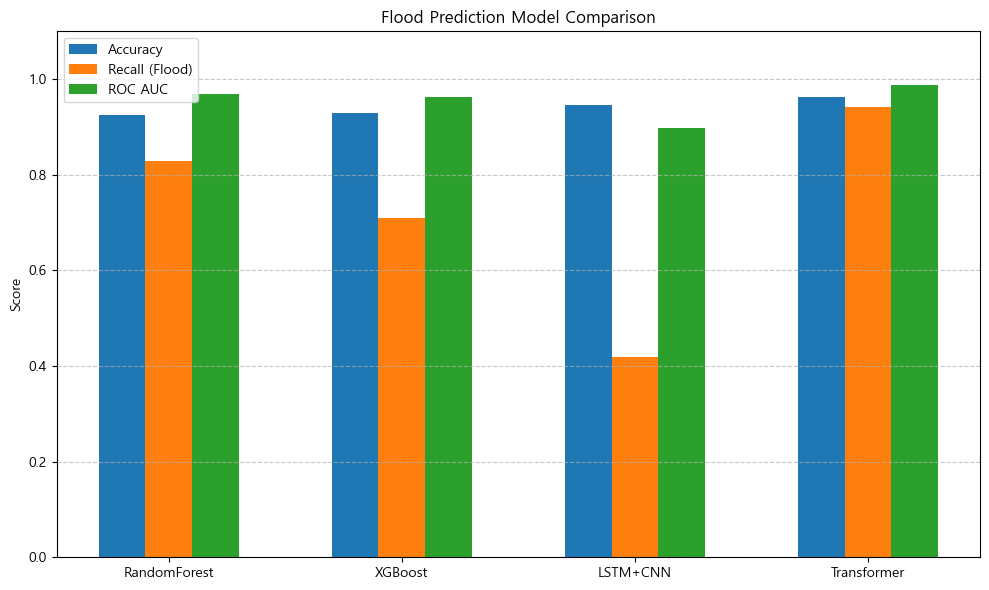

In [17]:
import matplotlib.pyplot as plt

# 모델 및 성능 지표
models = ["RandomForest", "XGBoost", "LSTM+CNN", "Transformer"]
accuracy = [0.9247, 0.9299, 0.9459, 0.9624]
recall = [0.8279, 0.7090, 0.4190, 0.9413]
roc_auc = [0.9680, 0.9618, 0.8976, 0.9874]

# 그래프 생성
plt.figure(figsize=(10, 6))
x = range(len(models))

# 막대 그래프 그리기
plt.bar(x, accuracy, width=0.2, label="Accuracy", align="center")
plt.bar([i + 0.2 for i in x], recall, width=0.2, label="Recall (Flood)", align="center")
plt.bar([i + 0.4 for i in x], roc_auc, width=0.2, label="ROC AUC", align="center")

# 라벨 및 설정
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0, 1.1)
plt.title("Flood Prediction Model Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 파일 저장 및 출력
plt.savefig("model_comparison_updated.png")
plt.show()

In [5]:
pip install numpy==1.24.3 pandas==2.1.1 --force-reinstall --upgrade

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.1.1 which is incompatible.



  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata (18 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
Using cached pandas-2.1.1-cp310-cp310-win_amd64.whl (10.7 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

  Attempting uninstall: pytz

    Found existing installation: pytz 2025.2

    Uninstalling pytz-2025.2:

      Successfully uninstalled pytz-2025.2

   ---------------------------------------- 0/6 [pytz]
   ------

# 한글설정, 워닝제거

In [11]:
# 한글설정
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지

#워닝 제거
import warnings
warnings.filterwarnings('ignore')

# smote 처리를 위한 라이브러리 설치

In [4]:
pip install imbalanced-learn


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 12.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 11.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.2 MB/s eta 0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 1.23.5

   ---------------------------------------- 0/4 [numpy]
   ---------------------------------------- 0/4 [numpy]
    Uninstalling numpy-1.23.5:
   ---------------------------------------- 0/4 [numpy]
   ---------------------------------------- 0/4 [numpy]
   ---------------------------------------- 0/4 [numpy]
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires numpy<2.0,>=1.21, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.


# api key 활용 및 데이터 수집

In [2]:
import os
from dotenv import load_dotenv
OPENWEATHER_API_KEY = load_dotenv('.env')
OPENWEATHER_API_KEY = os.getenv('OPENWEATHER_API_KEY')
# print(os.getenv('OPENWEATHER_API_KEY'))

# XGBOOST 머신러닝 GPU 사용하고 싶다면 XGBClassifier(tree_method='gpu_hist')

In [12]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로딩
df = pd.read_csv("asos_seoul_hourly_with_flood_risk.csv")

# 2. 결측치 처리
df['rn'] = df['rn'].fillna(0)
numeric_cols = ['ta', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. 파생 변수 생성
df['tm'] = pd.to_datetime(df['tm'])
df['month'] = df['tm'].dt.month

# 4. 입력/출력 설정
features = ['ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv', 'month']
X_full = df[features]
y_full = df['flood_risk']

# 5. 밸런싱
positive = df[df['flood_risk'] == 1]
negative = df[df['flood_risk'] == 0]
negative_sample = negative.sample(n=len(positive) * 10, random_state=42)
df_balanced = pd.concat([positive, negative_sample])

X = df_balanced[features]
y = df_balanced['flood_risk']

# 6. 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 7. SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. 모델 학습
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_resampled, y_train_resampled)

# 9. 평가
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[6966  351]
 [ 213  519]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9703    0.9520    0.9611      7317
           1     0.5966    0.7090    0.6479       732

    accuracy                         0.9299      8049
   macro avg     0.7834    0.8305    0.8045      8049
weighted avg     0.9363    0.9299    0.9326      8049


ROC AUC Score: 0.961799230924914


In [ ]:
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# from imblearn.over_sampling import SMOTE
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. CSV 파일 불러오기 (서울 시간별 ASOS 데이터 + 라벨 포함)
# df = pd.read_csv("asos_seoul_hourly_with_flood_risk.csv")

# # 2. 결측치 처리
# df['rn'] = df['rn'].fillna(0)  # 강수량 결측치는 0으로 간주
# numeric_cols = ['ta', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv']
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # 나머지는 중앙값으로 대체

# # 3. 파생 변수 생성 (month)
# df['tm'] = pd.to_datetime(df['tm'])       # 시간 문자열을 datetime 객체로 변환
# df['month'] = df['tm'].dt.month           # 월만 추출하여 새로운 특성 추가

# # 4. 입력(X), 출력(y) 변수 설정
# features = ['ta', 'rn', 'ws', 'wd', 'hm', 'pa', 'ps', 'td', 'pv', 'month']
# X_full = df[features]                     # X: 10개의 수치형 기상 변수
# y_full = df['flood_risk']                 # y: 침수 발생 여부 (0 또는 1)

# # 5. 클래스 불균형 해결 (침수 1이 너무 적으니까 10:1 비율로 맞춤)
# positive = df[df['flood_risk'] == 1]
# negative = df[df['flood_risk'] == 0]
# negative_sample = negative.sample(n=len(positive) * 10, random_state=42)
# df_balanced = pd.concat([positive, negative_sample])

# X = df_balanced[features]
# y = df_balanced['flood_risk']

# # 6. 학습/검증 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# # 7. SMOTE 적용 (오버샘플링, 적은 클래스인 flood_risk=1을 증폭)
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # 8. XGBoost 모델 학습
# model = XGBClassifier(
#     random_state=42,
#     use_label_encoder=False,  # label warning 안뜨게 설정
#     eval_metric='logloss'     # 이진 분류에서는 logloss 사용
# )
# model.fit(X_train_resampled, y_train_resampled)

# # 9. 예측 및 평가
# y_pred = model.predict(X_test)                    # 클래스 예측 (0 또는 1)
# y_proba = model.predict_proba(X_test)[:, 1]       # 침수 확률만 추출 (1일 확률)

# # 성능 출력
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
# print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


```
지표	값	의미
Accuracy	96.63%	전체 예측 정확도
Recall (class 1)	90.77%	실제 침수인 경우를 얼마나 잘 맞췄는지
Precision (class 1)	76.62%	침수라고 예측한 것 중 실제로 침수인 비율
F1-score (class 1)	83.10%	정밀도와 재현율의 균형
ROC AUC	0.991 	모델의 전반적 분류 능력 (1에 가까울수록 좋음)
```

# RandomForest VS XGBoost ML 비교하기
```
모델	       Accuracy	Recall (flood=1)	Precision (flood=1)	ROC AUC
RandomForest	92.47%	82.79%	              55.8%          	0.9680
XGBoost     	92.99%	70.9%	               59.7%	          0.9618
```

```
지표	값	해석
Accuracy	92.99%	전체 정확도 높음 (RandomForest보다 약간 ↑)
Recall (flood=1)	70.9%	침수 중 71% 검출 (RandomForest보다 약간 ↓)
Precision (flood=1)	59.7%	예측한 침수 중 60%가 실제 침수 (RandomForest보다 약간 ↑)
F1-score (flood=1)	64.8%	침수 클래스 예측 성능 준수
ROC AUC	0.9618	예측 구분력 매우 우수 (RandomForest보다 약간 ↓)
```

# 시각화하기

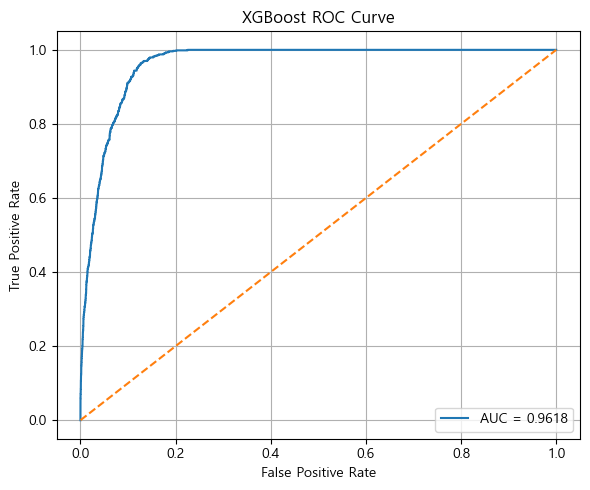

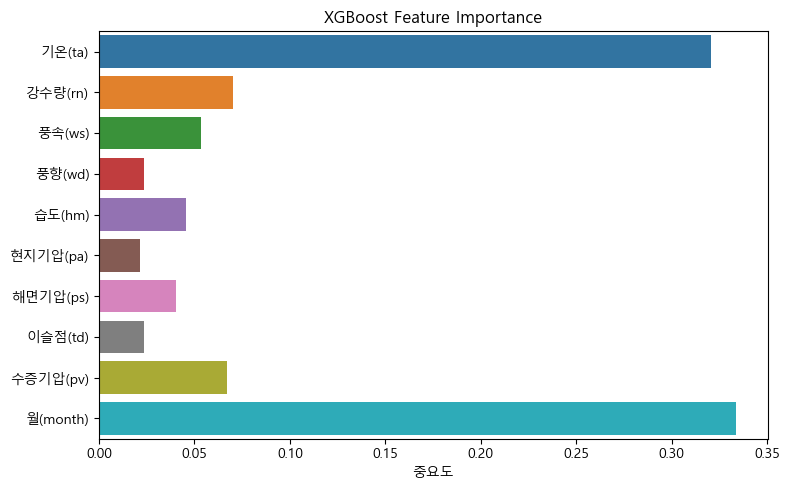

In [13]:
# 10. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("XGBoost ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 11. Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=[
    '기온(ta)', '강수량(rn)', '풍속(ws)', '풍향(wd)', '습도(hm)',
    '현지기압(pa)', '해면기압(ps)', '이슬점(td)', '수증기압(pv)', '월(month)'
])
plt.title("XGBoost Feature Importance")
plt.xlabel("중요도")
plt.tight_layout()
plt.show()

# 모델 저장하기와 불러오기 (.pkl)

In [14]:
import joblib

# 모델 저장
joblib.dump(model, 'xgboost_model.pkl')
print(" XGBoost 모델이 'xgboost_model.pkl'로 저장되었습니다.")

 XGBoost 모델이 'xgboost_model.pkl'로 저장되었습니다.


In [15]:
# 모델 불러오기
import joblib
loaded_model = joblib.load('xgboost_model.pkl')

# 예측
y_pred = loaded_model.predict(X_test)


# 예측 테스트하기

In [16]:
# 예측 테스트
sample_pred = loaded_model.predict(X_test[:5])
print("예측 결과 (샘플):", sample_pred)

예측 결과 (샘플): [0 0 0 0 0]
